# What to prepare?

1) Read MY FILE from the LINK I SHARED

In [ ]:
# link to GitHub
# No need to download this data
link="https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg"

# we use geopandas
# geopandas is in Colab, you need to install it in Anaconda.
import geopandas as gpd

# just the list of maps in that file
gpd.list_layers(link)

,name,geometry_type
0,cia,MultiPolygon
1,border,MultiPolygon


We open the map files:

In [ ]:
countriesCIA=gpd.read_file(link, layer='cia')
worldBorders=gpd.read_file(link, layer='border') # we will not use it here, but in R

Take a look at it:

In [ ]:
# see some rows
countriesCIA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COUNTRY               147 non-null    object  
 1   name                  147 non-null    object  
 2   region                147 non-null    object  
 3   obesityAdults_rate    147 non-null    float64 
 4   TobaccoUse_perc       147 non-null    float64 
 5   Alcohol_LitersPerCap  147 non-null    float64 
 6   tobacco_code          147 non-null    int64   
 7   tobacco_levels        147 non-null    object  
 8   tobacco_custom        147 non-null    object  
 9   alcohol_code          147 non-null    int64   
 10  alcohol_levels        147 non-null    object  
 11  geometry              147 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 13.9+ KB


As you see, I have these:

In [ ]:
# the data types
countriesCIA.loc[:,['tobacco_code','tobacco_levels','alcohol_code','alcohol_levels']]

,tobacco_code,tobacco_levels,alcohol_code,alcohol_levels
0,2,3.average,0,1.very low
1,2,3.average,0,1.very low
2,2,3.average,0,1.very low
3,2,3.average,2,3.average
4,2,3.average,1,2.low
...,...,...,...,...
142,1,2.low,1,2.low
143,2,3.average,0,1.very low
144,1,2.low,1,2.low
145,1,2.low,1,2.low


YOU NEED to PREPARE the SAME for:

In [ ]:
countriesCIA.obesityAdults_rate

,obesityAdults_rate
0,5.5
1,27.4
2,19.9
3,21.7
4,20.2
...,...
142,17.2
143,17.1
144,8.1
145,15.5


## HOW do I create the new columns

You need two new columns:


*  'obesity_code'
*  'obesity_levels'



you may need to install **pysal**!!

In [ ]:
# !pip install pysal # write a "#" (no quotations) after the installation

The decide what is the RIGHT SCHEME for 'obesityAdults_rate'.

Notice the code below is for 'TobaccoUse_perc', make the change!



<Axes: ylabel='Classifier'>

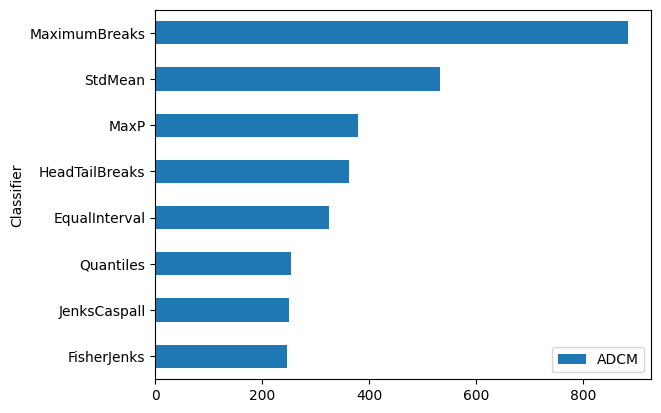

In [ ]:

import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 bins
K=5

theVar=countriesCIA.TobaccoUse_perc


# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)
# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

###### based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed

import pandas as pd

# Create a list of classifiers
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5

# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

# see the results
adcms.sort_values('ADCM').plot.barh(x='Classifier')

To create the new columns, you need to change this (*obesity* instead of *tobacco*):


In [ ]:
# map of labels for the levels
newLevels={0:'1.very low',1:'2.low', 2:'3.average',3:'4.high', 4:'5.very high'}

# get the values
countriesCIA['tobacco_code']=fj5.yb

# a copy in another column
countriesCIA=countriesCIA.assign(obesity_levels=countriesCIA.tobacco_code)

# recoding
countriesCIA.replace({'tobacco_levels':newLevels}, inplace=True)


## Last step here

update the map!

In [ ]:
countriesCIA.to_file('countriesCIA.gpkg', driver='GPKG', layer='cia')
worldBorders.to_file('countriesCIA.gpkg', driver='GPKG', layer='border')